<h1>Data Cleaning and Exploratory Data Analysis (EDA)</h1>

In [1]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Huleb\Downloads\Customers.csv")

In [3]:
x = data[['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 18', 'Unnamed: 17']]

In [4]:
data.drop(x, axis = 1, inplace = True)

In [5]:
data.rename(columns ={'Unnamed: 4':'FullName'}, inplace = True)

In [6]:
data['TotalChildren'] = data['TotalChildren'].astype(int)

In [7]:
data['BirthDate'] = pd.to_datetime(data['BirthDate'], format = 'mixed')
#passing format='ISO8601' if your strings are all ISO8601 but not necessarily in exactly the same format;
#passing format='mixed'
#passing format='%d%m%y'

In [8]:
data['BirthDate.1']= pd.to_datetime(data['BirthDate.1'], format = 'mixed')

In [9]:
data['AnnualIncome'] = data['AnnualIncome'].str.strip('$').str.replace(',', '').astype(int)
#data['AnnualIncome'].replace({'$':'', ' ': ''})

In [10]:
data['AvgTotalChildren'] = data['TotalChildren'].mean().astype(int)

In [11]:
data.ffill(inplace = True)

In [12]:
data.isna().sum()

CustomerKey         0
Prefix              0
FirstName           0
LastName            0
FullName            0
BirthDate           0
MaritalStatus       0
Gender              0
EmailAddress        0
AnnualIncome        0
TotalChildren       0
EducationLevel      0
Occupation          0
HomeOwner           0
BirthDate.1         0
AvgTotalChildren    0
dtype: int64

In [13]:
data.MaritalStatus = data.MaritalStatus.replace({'S':'Single','M':'Married'})

In [14]:
data.Gender = data.Gender.replace({'F':'Female','M':'Male'})

In [15]:
data['Gender'] = data['Gender'].ffill()

In [16]:
data['AvgTotalChildren'] = data['TotalChildren'].mean().astype(int)

In [17]:
data['AvgAnnualIncome'] = data['AnnualIncome'].mean()

In [18]:
data['Age'] = (pd.to_datetime("today")).year - (data['BirthDate']).dt.year

In [19]:
data['BirthMonth'] = data['BirthDate'].dt.month.apply(lambda x: 'January' if (x == 1) else ('February' if (x == 2) else ('March' if (x == 3) else ('April' if (x == 4) else  ('May' if (x == 5) else ('June' if (x == 6) else ('July' if (x == 7) else ('August' if (x == 8) else ('September' if (x == 9) else ('October' 
                                                                                                                         if (x == 10) else ('November' if (x == 11) else ('December' if (x == 12) else 'Out of range'))))))))))))

In [20]:
data['HomeOwner'] = data['HomeOwner'].replace({'Y':'Yes','N':'No'})

In [21]:
data.drop('BirthDate.1', axis = 1, inplace = True)

In [22]:
data['Income_Range'] = pd.cut(data['AnnualIncome'], bins = [0, 50000, 100000,200000])

In [23]:
data['Age_Group'] = pd.cut(data['Age'], bins = [0, 20, 40, 60, 80, 100, 120])

In [24]:
data.head(50)

,CustomerKey,Prefix,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,AvgTotalChildren,AvgAnnualIncome,Age,BirthMonth,Income_Range,Age_Group
0,11000,MR.,JON,YANG,MR. JON YANG,1966-04-08,Married,Male,jon24@learnsector.com,90000,2,Bachelors,Professional,Yes,1,57269.120564,58,April,"(50000, 100000]","(40, 60]"
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,1965-05-14,Single,Male,eugene10@learnsector.com,60000,3,Bachelors,Professional,No,1,57269.120564,59,May,"(50000, 100000]","(40, 60]"
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,1965-08-12,Married,Male,ruben35@learnsector.com,60000,3,Bachelors,Professional,Yes,1,57269.120564,59,August,"(50000, 100000]","(40, 60]"
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,1968-02-15,Single,Female,christy12@learnsector.com,70000,0,Bachelors,Professional,No,1,57269.120564,56,February,"(50000, 100000]","(40, 60]"
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,1968-08-08,Single,Female,elizabeth5@learnsector.com,80000,5,Bachelors,Professional,Yes,1,57269.120564,56,August,"(50000, 100000]","(40, 60]"
5,11005,MR.,JULIO,RUIZ,MR. JULIO RUIZ,1965-08-05,Single,Male,julio1@learnsector.com,70000,0,Bachelors,Professional,Yes,1,57269.120564,59,August,"(50000, 100000]","(40, 60]"
6,11007,MR.,MARCO,MEHTA,MR. MARCO MEHTA,1964-05-09,Married,Male,marco14@learnsector.com,60000,3,Bachelors,Professional,Yes,1,57269.120564,60,May,"(50000, 100000]","(40, 60]"
7,11008,MRS.,ROBIN,VERHOFF,MRS. ROBIN VERHOFF,1964-07-07,Single,Female,rob4@learnsector.com,60000,4,Bachelors,Professional,Yes,1,57269.120564,60,July,"(50000, 100000]","(40, 60]"
8,11009,MR.,SHANNON,CARLSON,MR. SHANNON CARLSON,1964-04-01,Single,Male,shannon38@learnsector.com,70000,0,Bachelors,Professional,No,1,57269.120564,60,April,"(50000, 100000]","(40, 60]"
9,11010,MS.,JACQUELYN,SUAREZ,MS. JACQUELYN SUAREZ,1964-02-06,Single,Female,jacquelyn20@learnsector.com,70000,0,Bachelors,Professional,No,1,57269.120564,60,February,"(50000, 100000]","(40, 60]"


<h2>Exploratory Data Analysis</h2>

1. Create a bar chart showing the count of customers by MaritalStatus.

In [25]:
data.MaritalStatus.value_counts().reset_index()

,MaritalStatus,count
0,Married,9817
1,Single,8331


Text(0.5, 0, 'Marital Status')

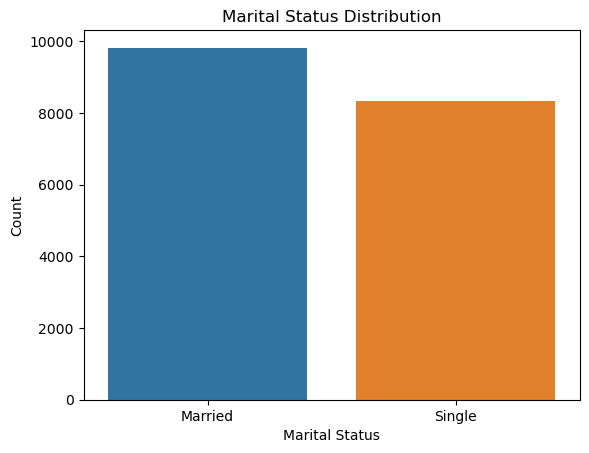

In [26]:
sns.countplot(x = 'MaritalStatus', data = data)
plt.title('Marital Status Distribution')
plt.ylabel('Count')
plt.xlabel('Marital Status')

2. Visualize the proportion of customers by Gender using a pie chart.


In [27]:
data['Gender'].value_counts().reset_index()

,Gender,count
0,Male,9189
1,Female,8959


Text(0.5, 1.0, 'Gender Distribution')

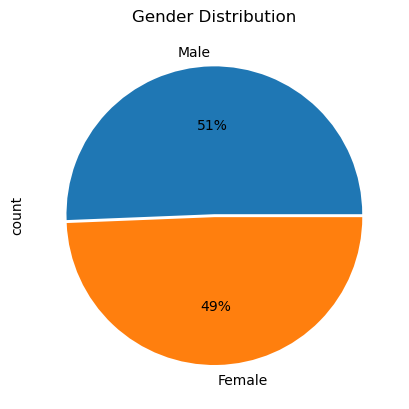

In [38]:
data.Gender.value_counts().plot(kind = 'pie', autopct='%.0f%%', explode = [0, 0.02] )
plt.title('Gender Distribution')

3. Generate a histogram of AnnualIncome to examine its distribution (Note: Convert AnnualIncome to a numeric format first)

In [ ]:
data.AnnualIncome.value_counts().reset_index()

In [ ]:
sns.histplot(x = 'AnnualIncome', data=data)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')

4. Create a column chart displaying the average number of TotalChildren for each EducationLevel

In [ ]:
data.groupby(['AvgTotalChildren','EducationLevel']).size().reset_index()

In [ ]:
sns.countplot(x = 'AvgTotalChildren', hue ='EducationLevel', data = data)
plt.title('Average Number of Children Across Education Level Distribution')
plt.xlabel('Average Number Total Children')
plt.ylabel('Number of Customers')

5. Use a bar chart to compare the average AnnualIncome across different Occupation categories.

In [ ]:
data.groupby(['AvgAnnualIncome', 'Occupation']).size().reset_index()

In [ ]:
sns.countplot(x= 'AvgAnnualIncome', hue = 'Occupation', data=data)
plt.title('Annual Income Across Occupation Categories Distribution.')
plt.xlabel('Average Annual Income')
plt.ylabel('Number of Customers')

6. Visualize the count of customers in each Occupation category using a pie chart.

In [ ]:
data.Occupation.value_counts().reset_index()

Text(0, 0.5, ' ')

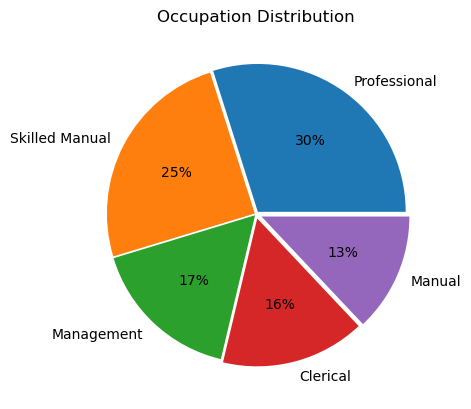

In [35]:
data.Occupation.value_counts().plot(kind = 'pie', autopct='%.0f%%', explode = [0.02,0.01,0.01,0.03,0.04,])
plt.title('Occupation Distribution')
plt.ylabel(' ')

7. Generate a histogram to explore the age distribution of customers (Age needs to be derived from BirthDate)

In [ ]:
data.Age.value_counts().reset_index()

In [ ]:
sns.histplot(x = 'Age', data=data)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

8. Plot a line chart to show changes in the average AnnualIncome over different age groups.

In [32]:
data.groupby(['Age_Group','AvgAnnualIncome']).size().reset_index()

C:\Users\Huleb\AppData\Local\Temp\ipykernel_3884\2566535196.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['Age_Group','AvgAnnualIncome']).size().reset_index()


,Age_Group,AvgAnnualIncome,0
0,"(0, 20]",57269.120564,0
1,"(20, 40]",57269.120564,0
2,"(40, 60]",57269.120564,8856
3,"(60, 80]",57269.120564,7925
4,"(80, 100]",57269.120564,1337
5,"(100, 120]",57269.120564,30


C:\Users\Huleb\AppData\Local\Temp\ipykernel_3884\2342825462.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['Age_Group','AvgAnnualIncome']).size().plot(kind = 'line')


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, '((100, 120], 57269.120564249504)'),
  Text(0.0, 0, '((0, 20], 57269.120564249504)'),
  Text(1.0, 0, '((20, 40], 57269.120564249504)'),
  Text(2.0, 0, '((40, 60], 57269.120564249504)'),
  Text(3.0, 0, '((60, 80], 57269.120564249504)'),
  Text(4.0, 0, '((80, 100], 57269.120564249504)'),
  Text(5.0, 0, '((100, 120], 57269.120564249504)'),
  Text(6.0, 0, '')])

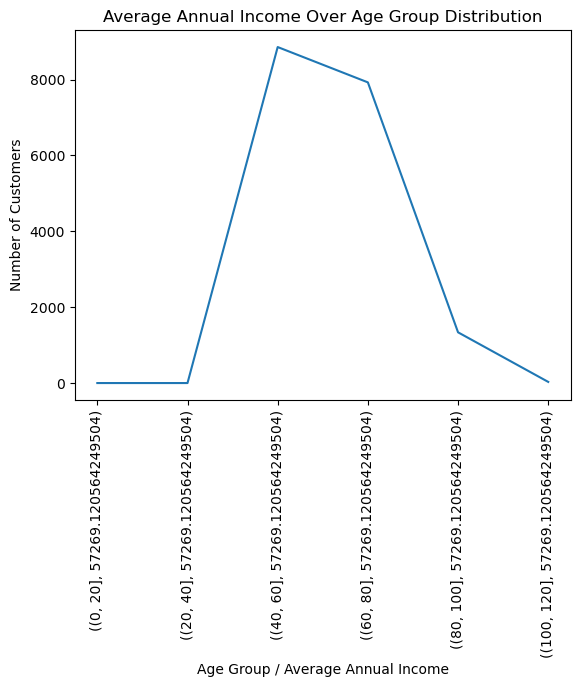

In [33]:
data.groupby(['Age_Group','AvgAnnualIncome']).size().plot(kind = 'line')
plt.title('Average Annual Income Over Age Group Distribution')
plt.xlabel('Age Group / Average Annual Income')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)

9. Create a bar chart that shows the number of homeowners vs. non-homeowners (HomeOwner status).

In [ ]:
data.HomeOwner.value_counts().reset_index()

In [ ]:
data.HomeOwner.value_counts().plot(kind = 'bar', color = ['red', 'navy'])
plt.title('Home Owners Distribution')
plt.xlabel('Home Owners')
plt.ylabel('Number of Customers')

In [ ]:
data.EducationLevel.value_counts().reset_index()

10. Use a column chart to display the total number of customers by EducationLevel.

In [ ]:
sns.countplot(x = 'EducationLevel', data = data)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)

11. Visualize the distribution of TotalChildren using a histogram.


In [ ]:
data.TotalChildren.value_counts().reset_index()

In [ ]:
sns.histplot(x = 'TotalChildren', data = data)
plt.title('Total Children Distribution')
plt.xlabel('Total Children')
plt.ylabel('Number of Customers')

12. 
Create a pie chart showing the proportion of different MaritalStatus categories within a specific Occupation.

In [ ]:
data.groupby(['MaritalStatus', 'Occupation']).size().reset_index()

In [ ]:
data.groupby(['MaritalStatus', 'Occupation']).size().plot(kind='pie')
plt.title('MaritalStatus Across Occupation Distribution')


In [ ]:
data.groupby(['MaritalStatus', 'Occupation']).size().plot(kind='pie',autopct='%.0f%%', explode = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,])
plt.title('MaritalStatus Across Occupation Distribution')

13. Plot a bar chart comparing the count of male vs. female customers in each EducationLevel.

In [ ]:
data.groupby(['Gender', 'EducationLevel']).size().reset_index()

In [ ]:
sns.countplot(x = 'EducationLevel', hue= 'Gender', data = data)
plt.title('Gender Across Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)

14. Use a line chart to depict the average number of TotalChildren across different income ranges.

In [ ]:
data.groupby(['Income_Range','AvgTotalChildren']).size().reset_index()

In [ ]:
data.groupby(['AvgTotalChildren', 'Income_Range']).size().plot(kind = 'line')
plt.title('Average Number Total Children Across Income Range Distribution')
plt.xlabel('Average Total Children / Income Range')
plt.ylabel('Number of Customers')

15. Generate a column chart that illustrates the count of customers by HomeOwner status for each MaritalStatus

In [ ]:
data.groupby(['HomeOwner', 'MaritalStatus']).size().reset_index()

In [ ]:
sns.countplot(x = 'MaritalStatus', hue = 'HomeOwner', data = data)
plt.title('Marital Status Across Home Owners Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')

16. Visualize the distribution of customers' birth months using a bar chart (Extract month from BirthDate).

In [ ]:
data['BirthMonth'].value_counts().reset_index()

In [ ]:
sns.countplot(x = 'BirthMonth', data = data)
#data['BirthMonth'].value_counts().plot(kind = 'bar')
plt.title('Birth Month Distribution')
plt.xlabel('Birth Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)

17. Create a pie chart to represent the proportion of customers by Occupation within a specific income range.

In [ ]:
data.groupby(['Occupation','AnnualIncome']).size().reset_index()

In [ ]:
data.groupby(['Occupation','Income_Range']).size().plot(kind='pie', autopct='%.0f%%')
plt.title('Occupation Across Income Range Distribution')


18. Use a bar chart to show the frequency of each EducationLevel category.

In [39]:
data.EducationLevel.value_counts().reset_index()

,EducationLevel,count
0,Bachelors,5261
1,Partial College,4966
2,High School,3241
3,Graduate Degree,3125
4,Partial High School,1555


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Partial College'),
  Text(2, 0, 'High School'),
  Text(3, 0, 'Partial High School'),
  Text(4, 0, 'Graduate Degree')])

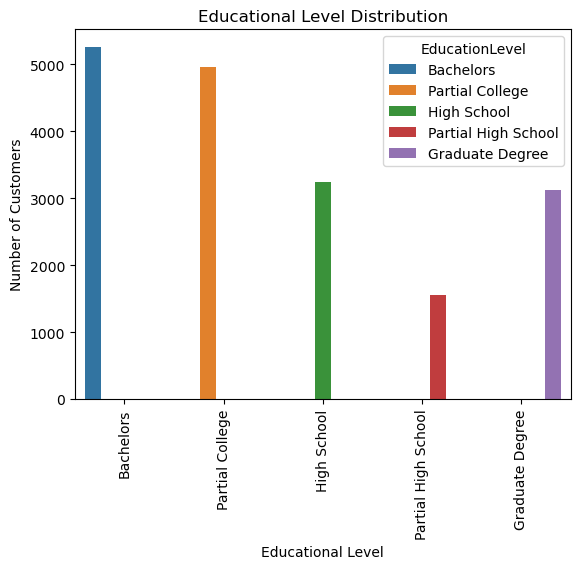

In [40]:
sns.countplot(x = 'EducationLevel', data = data, hue = 'EducationLevel')
plt.title('Educational Level Distribution')
plt.xlabel('Educational Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)